## Specific disorder

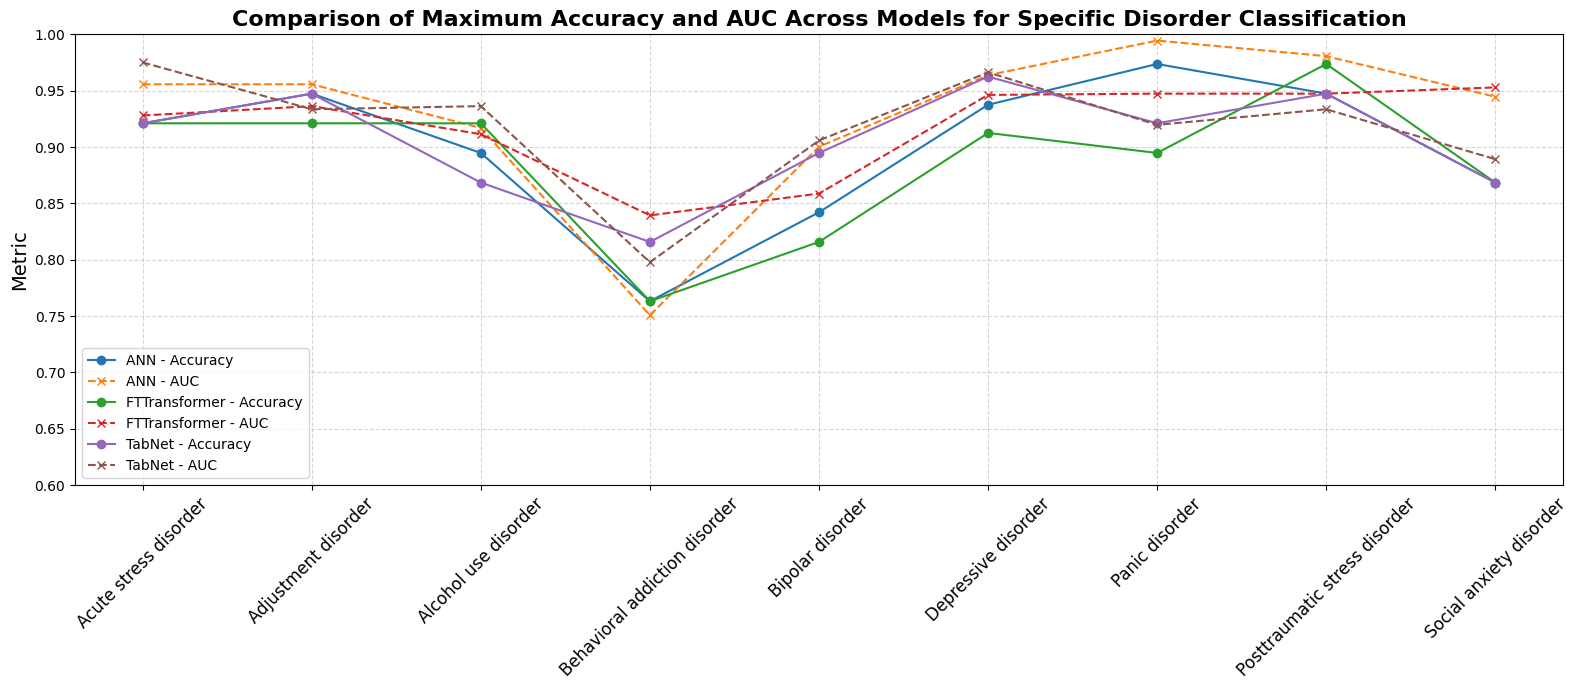

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_ann_spec = pd.read_csv('./binary_classification_specifc_disorder_ann.csv')
df_fttransformer_spec = pd.read_csv('./binary_classification_specific_disorder_fttransformer.csv')
df_tabnet_spec = pd.read_csv('./binary_classification_specifc_disorder_tabnet_last.csv')

df_ann_spec['Model'] = 'ANN'
df_fttransformer_spec['Model'] = 'FTTransformer'
df_tabnet_spec['Model'] = 'TabNet'



best_ann = df_ann_spec.loc[df_ann_spec.groupby('Disorder')['Accuracy'].idxmax()]
best_ftt = df_fttransformer_spec.loc[df_fttransformer_spec.groupby('Disorder')['Accuracy'].idxmax()]
best_tabnet = df_tabnet_spec.loc[df_tabnet_spec.groupby('Disorder')['Accuracy'].idxmax()]

df_best_spec = pd.concat([best_ann, best_ftt, best_tabnet], ignore_index=True)

def build_metrics_per_disorder(df):
    accuracy = {}
    auc = {}
    for disorder in sorted(df['Disorder'].unique()):
        data = df[df['Disorder'] == disorder].sort_values('Model')
        accuracy[disorder] = data['Accuracy'].tolist()
        auc[disorder] = data['AUC'].tolist()
    return accuracy, auc

accuracy_spec, auc_spec = build_metrics_per_disorder(df_best_spec)

labels = list(accuracy_spec.keys())
models = ['ANN', 'FTTransformer', 'TabNet']
x = np.arange(len(labels))

plt.figure(figsize=(16, 7))

for i, model in enumerate(models):
    acc_vals = [accuracy_spec[label][i] for label in labels]
    auc_vals = [auc_spec[label][i] for label in labels]
    plt.plot(x, acc_vals, marker='o', linestyle='-', label=f'{model} - Accuracy')
    plt.plot(x, auc_vals, marker='x', linestyle='--', label=f'{model} - AUC')

plt.xticks(x, labels, rotation=45, fontsize=12)
plt.ylim(0.6, 1.0)
plt.ylabel('Metric', fontsize=14)
plt.title('Comparison of Maximum Accuracy and AUC Across Models for Specific Disorder Classification', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('model_comparison_specific_disorder.eps', format='eps', dpi=300)
plt.savefig('model_comparison_specific_disorder.png', dpi=300)
plt.show()


In [2]:
df_ann_spec = pd.read_csv('./binary_classification_specifc_disorder_ann.csv')
df_fttransformer_spec = pd.read_csv('./binary_classification_specific_disorder_fttransformer.csv')
df_tabnet_spec = pd.read_csv('./binary_classification_specifc_disorder_tabnet_last.csv')

df_ann_spec['Model'] = 'ANN'
df_fttransformer_spec['Model'] = 'FTTransformer'
df_tabnet_spec['Model'] = 'TabNet'

df_all = pd.concat([df_ann_spec, df_fttransformer_spec, df_tabnet_spec], ignore_index=True)

cols = ['Disorder', 'DataFrame', 'Accuracy','AUC', 'Classification Report','Model']
df_all = df_all[cols]

disorder_df_pairs = [
    ('Acute stress disorder', 'psd_delta'),
    ('Adjustment disorder', 'psd_beta'),
    ('Alcohol use disorder', 'fc_highbeta'),
    ('Behavioral addiction disorder', 'psd_fc_theta'),
    ('Bipolar disorder', 'psd_beta'),
    ('Depressive disorder', 'fc_beta'),
    ('Panic disorder', 'psd_all_bands'),
    ('Posttraumatic stress disorder', 'psd_fc_gamma'),
    ('Social anxiety disorder', 'fc_all_bands')
]

results = []

for disorder, df_name in disorder_df_pairs:
    for model in ['ANN', 'FTTransformer', 'TabNet']:
        match = df_all[
            (df_all['Disorder'] == disorder) &
            (df_all['DataFrame'] == df_name) &
            (df_all['Model'] == model)
        ]
        if not match.empty:
            results.append(match)

df_filtered = pd.concat(results, ignore_index=True)

df_filtered.to_csv('filtered_disorder_results_specific_disorder.csv', index=False)

df_filtered


,Disorder,DataFrame,Accuracy,AUC,Classification Report,Model
0,Acute stress disorder,psd_delta,0.921053,0.955679,"{'0': {'precision': 0.9444444444444444, 'recal...",ANN
1,Acute stress disorder,psd_delta,0.868421,0.922438,precision recall f1-score ...,FTTransformer
2,Acute stress disorder,psd_delta,0.921053,0.972299,precision recall f1-score ...,TabNet
3,Adjustment disorder,psd_beta,0.947368,0.955679,"{'0': {'precision': 0.9047619047619048, 'recal...",ANN
4,Adjustment disorder,psd_beta,0.842105,0.891967,precision recall f1-score ...,FTTransformer
5,Adjustment disorder,psd_beta,0.868421,0.894737,precision recall f1-score ...,TabNet
6,Alcohol use disorder,fc_highbeta,0.789474,0.858726,"{'0': {'precision': 0.7894736842105263, 'recal...",ANN
7,Alcohol use disorder,fc_highbeta,0.921053,0.911357,precision recall f1-score ...,FTTransformer
8,Alcohol use disorder,fc_highbeta,0.657895,0.587258,precision recall f1-score ...,TabNet
9,Behavioral addiction disorder,psd_fc_theta,0.736842,0.761773,"{'0': {'precision': 0.7368421052631579, 'recal...",ANN


In [3]:
winners = df_best_spec.loc[df_best_spec.groupby('Disorder')['Accuracy'].idxmax()].reset_index(drop=True)

winners = winners[['Disorder', 'Model', 'Accuracy', 'AUC', 'DataFrame']]
print(winners['DataFrame'])
pd.DataFrame(winners)


0        psd_delta
1         psd_beta
2      fc_highbeta
3     psd_fc_theta
4         psd_beta
5          fc_beta
6    psd_all_bands
7     psd_fc_gamma
8     fc_all_bands
Name: DataFrame, dtype: object


,Disorder,Model,Accuracy,AUC,DataFrame
0,Acute stress disorder,ANN,0.921053,0.955679,psd_delta
1,Adjustment disorder,ANN,0.947368,0.955679,psd_beta
2,Alcohol use disorder,FTTransformer,0.921053,0.911357,fc_highbeta
3,Behavioral addiction disorder,TabNet,0.815789,0.797784,psd_fc_theta
4,Bipolar disorder,TabNet,0.894737,0.905817,psd_beta
5,Depressive disorder,TabNet,0.962500,0.966250,fc_beta
6,Panic disorder,ANN,0.973684,0.994460,psd_all_bands
7,Posttraumatic stress disorder,FTTransformer,0.973684,0.947368,psd_fc_gamma
8,Social anxiety disorder,ANN,0.868421,0.944598,fc_all_bands


In [4]:
df_ann_spec = pd.read_csv('./binary_classification_specifc_disorder_ann.csv')
df_fttransformer_spec = pd.read_csv('./binary_classification_specific_disorder_fttransformer.csv')
df_tabnet_spec = pd.read_csv('./binary_classification_specifc_disorder_tabnet_last.csv')

df_ann_spec['Model'] = 'ANN'
df_fttransformer_spec['Model'] = 'FTTransformer'
df_tabnet_spec['Model'] = 'TabNet'

df_all = pd.concat([df_ann_spec, df_fttransformer_spec, df_tabnet_spec], ignore_index=True)

df_filtered = df_all[df_all['DataFrame'] == 'psd_fc_all_bands']

print(f"Disorders with 'psd_fc_all_bands': {df_filtered['Disorder'].nunique()}")

idx_max_acc = df_filtered.groupby('Disorder')['Accuracy'].idxmax()

df_best_psd_fc_all_bands = df_filtered.loc[idx_max_acc].reset_index(drop=True)

df_best_psd_fc_all_bands.to_csv('best_psd_fc_all_bands_specific_disorder.csv', index=False)

pd.DataFrame(df_best_psd_fc_all_bands)

Disorders with 'psd_fc_all_bands': 9


,Disorder,Dict,DataFrame,Accuracy,AUC,Classification Report,Model
0,Acute stress disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.868421,0.908587,precision recall f1-score ...,FTTransformer
1,Adjustment disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.921053,0.936288,precision recall f1-score ...,FTTransformer
2,Alcohol use disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.815789,0.897507,"{'0': {'precision': 0.8, 'recall': 0.842105263...",ANN
3,Behavioral addiction disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.710526,0.736842,precision recall f1-score ...,FTTransformer
4,Bipolar disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.815789,0.880886,"{'0': {'precision': 0.8, 'recall': 0.842105263...",ANN
5,Depressive disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.862500,0.899375,"{'0': {'precision': 0.8372093023255814, 'recal...",ANN
6,Panic disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.789474,0.850416,precision recall f1-score ...,FTTransformer
7,Posttraumatic stress disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.842105,0.972299,precision recall f1-score ...,FTTransformer
8,Social anxiety disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.815789,0.905817,"{'0': {'precision': 0.8333333333333334, 'recal...",ANN


In [5]:
winners = df_best_spec.loc[df_best_spec.groupby('Disorder')['Accuracy'].idxmax()]
winner_count = winners['Model'].value_counts()
winner_count

Model
ANN              4
TabNet           3
FTTransformer    2
Name: count, dtype: int64

## Main disorder

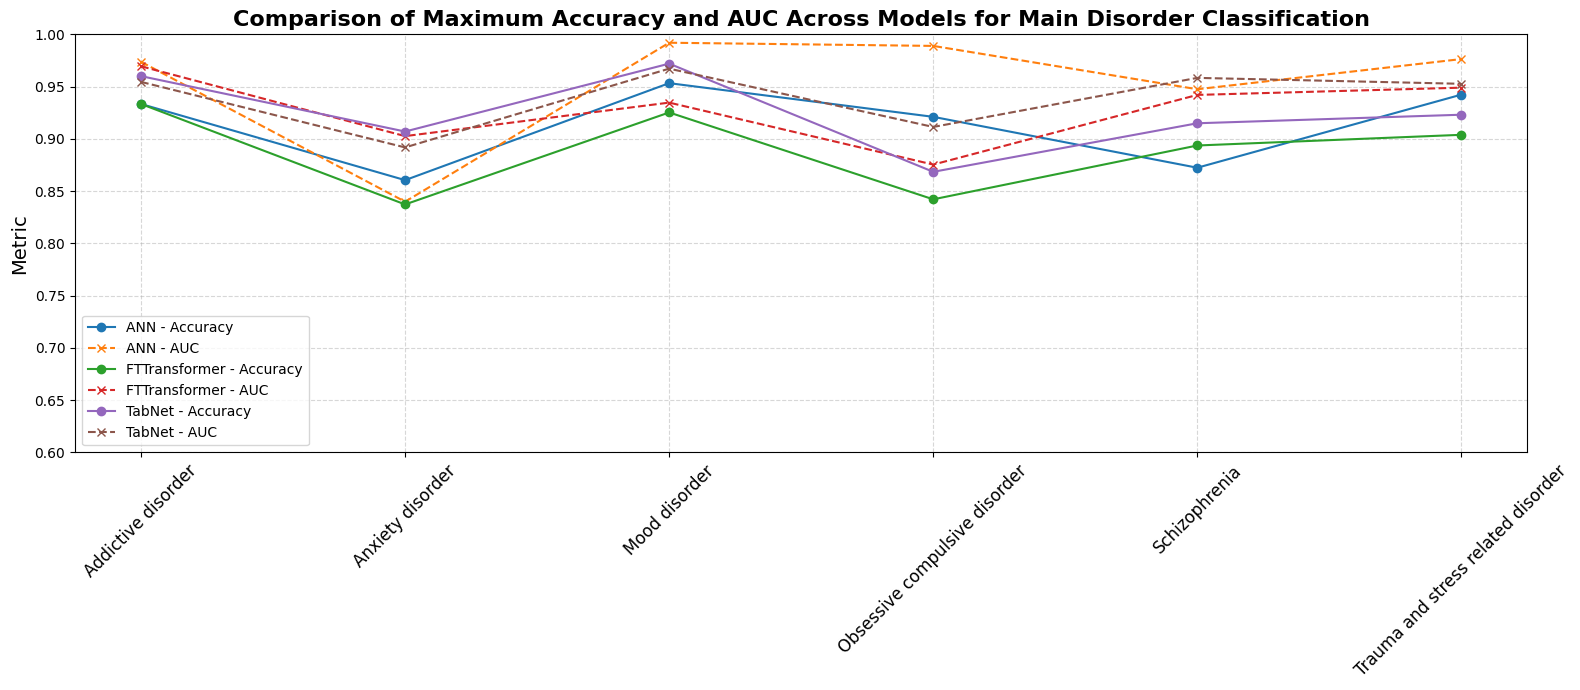

In [6]:
df_ann_main = pd.read_csv('./binary_classification_main_disorder_ann.csv')
df_fttransformer_main = pd.read_csv('./binary_classification_main_disorder_fttransformer.csv')
df_tabnet_main = pd.read_csv('./binary_classification_main_disorder_tabnet_last.csv')

df_ann_main['Model'] = 'ANN'
df_fttransformer_main['Model'] = 'FTTransformer'
df_tabnet_main['Model'] = 'TabNet'

best_ann = df_ann_main.loc[df_ann_main.groupby('Disorder')['Accuracy'].idxmax()]
best_ftt = df_fttransformer_main.loc[df_fttransformer_main.groupby('Disorder')['Accuracy'].idxmax()]
best_tabnet = df_tabnet_main.loc[df_tabnet_main.groupby('Disorder')['Accuracy'].idxmax()]

df_best = pd.concat([best_ann, best_ftt, best_tabnet], ignore_index=True)

def build_metrics_per_disorder(df):
    accuracy = {}
    auc = {}
    for disorder in sorted(df['Disorder'].unique()):
        data = df[df['Disorder'] == disorder].sort_values('Model')
        accuracy[disorder] = data['Accuracy'].tolist()
        auc[disorder] = data['AUC'].tolist()
    return accuracy, auc

accuracy_main, auc_main = build_metrics_per_disorder(df_best)

labels = list(accuracy_main.keys())
models = ['ANN', 'FTTransformer', 'TabNet']
x = np.arange(len(labels))

plt.figure(figsize=(16, 7))

for i, model in enumerate(models):
    acc_vals = [accuracy_main[label][i] for label in labels]
    auc_vals = [auc_main[label][i] for label in labels]
    plt.plot(x, acc_vals, marker='o', linestyle='-', label=f'{model} - Accuracy')
    plt.plot(x, auc_vals, marker='x', linestyle='--', label=f'{model} - AUC')

plt.xticks(x, labels, rotation=45, fontsize=12)
plt.ylim(0.6, 1.0)
plt.ylabel('Metric', fontsize=14)
plt.title('Comparison of Maximum Accuracy and AUC Across Models for Main Disorder Classification', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison_main_disorder.png', dpi=300)
plt.show()


In [7]:
df_ann_main = pd.read_csv('./binary_classification_main_disorder_ann.csv')
df_fttransformer_main = pd.read_csv('./binary_classification_main_disorder_fttransformer.csv')
df_tabnet_main = pd.read_csv('./binary_classification_main_disorder_tabnet_last.csv')

df_ann_main['Model'] = 'ANN'
df_fttransformer_main['Model'] = 'FTTransformer'
df_tabnet_main['Model'] = 'TabNet'

df_all = pd.concat([df_ann_main, df_fttransformer_main, df_tabnet_main], ignore_index=True)

df_filtered = df_all[df_all['DataFrame'] == 'psd_fc_all_bands']

print(f"Disorders with 'psd_fc_all_bands': {df_filtered['Disorder'].nunique()}")

idx_max_acc = df_filtered.groupby('Disorder')['Accuracy'].idxmax()

df_best_psd_fc_all_bands = df_filtered.loc[idx_max_acc].reset_index(drop=True)

df_best_psd_fc_all_bands.to_csv('best_psd_fc_all_bands_main_disorder.csv', index=False)

pd.DataFrame(df_best_psd_fc_all_bands)


Disorders with 'psd_fc_all_bands': 6


,Disorder,Dict,DataFrame,Accuracy,AUC,Classification Report,Model
0,Addictive disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.840000,0.923898,"{'0': {'precision': 0.8421052631578947, 'recal...",ANN
1,Anxiety disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.767442,0.727273,"{'0': {'precision': 0.7142857142857143, 'recal...",FTTransformer
2,Mood disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.934579,0.931866,precision recall f1-score ...,TabNet
3,Obsessive compulsive disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.842105,0.875346,"{'0': {'precision': 0.8823529411764706, 'recal...",FTTransformer
4,Schizophrenia,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.872340,0.943841,"{'0': {'precision': 0.875, 'recall': 0.875, 'f...",ANN
5,Trauma and stress related disorder,df_dict_psd_fc_all_bands,psd_fc_all_bands,0.865385,0.893491,precision recall f1-score ...,TabNet


In [8]:
winners = df_best.loc[df_best.groupby('Disorder')['Accuracy'].idxmax()].reset_index(drop=True)

winners = winners[['Disorder', 'Model', 'Accuracy', 'AUC', 'DataFrame']]
print(winners['DataFrame'])
pd.DataFrame(winners)


0      psd_fc_beta
1        psd_delta
2      psd_fc_beta
3        psd_delta
4         psd_beta
5    psd_all_bands
Name: DataFrame, dtype: object


,Disorder,Model,Accuracy,AUC,DataFrame
0,Addictive disorder,TabNet,0.960000,0.954481,psd_fc_beta
1,Anxiety disorder,TabNet,0.906977,0.891775,psd_delta
2,Mood disorder,TabNet,0.971963,0.967156,psd_fc_beta
3,Obsessive compulsive disorder,ANN,0.921053,0.988920,psd_delta
4,Schizophrenia,TabNet,0.914894,0.958333,psd_beta
5,Trauma and stress related disorder,ANN,0.942308,0.976331,psd_all_bands


In [9]:
df_ann_main = pd.read_csv('./binary_classification_main_disorder_ann.csv')
df_fttransformer_main = pd.read_csv('./binary_classification_main_disorder_fttransformer.csv')
df_tabnet_main = pd.read_csv('./binary_classification_main_disorder_tabnet_last.csv')

df_ann_main['Model'] = 'ANN'
df_fttransformer_main['Model'] = 'FTTransformer'
df_tabnet_main['Model'] = 'TabNet'

df_all = pd.concat([df_ann_main, df_fttransformer_main, df_tabnet_main], ignore_index=True)

cols = ['Disorder', 'DataFrame', 'Accuracy', 'AUC', 'Classification Report', 'Model']
df_all = df_all[cols]

disorder_df_pairs = [
    ('Addictive disorder', 'psd_fc_beta'),
    ('Anxiety disorder', 'psd_delta'),
    ('Mood disorder', 'psd_fc_beta'),
    ('Obsessive compulsive disorder', 'psd_delta'),
    ('Schizophrenia', 'psd_beta'),
    ('Trauma and stress related disorder', 'psd_all_bands')
]

results = []

for disorder, df_name in disorder_df_pairs:
    for model in ['ANN', 'FTTransformer', 'TabNet']:
        match = df_all[
            (df_all['Disorder'] == disorder) &
            (df_all['DataFrame'] == df_name) &
            (df_all['Model'] == model)
        ]
        if not match.empty:
            results.append(match)

df_filtered = pd.concat(results, ignore_index=True)
df_filtered.to_csv('filtered_main_disorder_results.csv', index=False)

df_filtered


,Disorder,DataFrame,Accuracy,AUC,Classification Report,Model
0,Addictive disorder,psd_fc_beta,0.840000,0.928876,"{'0': {'precision': 0.8421052631578947, 'recal...",ANN
1,Addictive disorder,psd_fc_beta,0.786667,0.806543,"{'0': {'precision': 0.8055555555555556, 'recal...",FTTransformer
2,Addictive disorder,psd_fc_beta,0.960000,0.954481,precision recall f1-score ...,TabNet
3,Anxiety disorder,psd_delta,0.790698,0.857143,"{'0': {'precision': 0.76, 'recall': 0.86363636...",ANN
4,Anxiety disorder,psd_delta,0.767442,0.859307,"{'0': {'precision': 0.7307692307692307, 'recal...",FTTransformer
5,Anxiety disorder,psd_delta,0.906977,0.891775,precision recall f1-score ...,TabNet
6,Mood disorder,psd_fc_beta,0.953271,0.991964,"{'0': {'precision': 0.9298245614035088, 'recal...",ANN
7,Mood disorder,psd_fc_beta,0.878505,0.939203,"{'0': {'precision': 0.8727272727272727, 'recal...",FTTransformer
8,Mood disorder,psd_fc_beta,0.971963,0.967156,precision recall f1-score ...,TabNet
9,Obsessive compulsive disorder,psd_delta,0.921053,0.988920,"{'0': {'precision': 0.9444444444444444, 'recal...",ANN
